In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'Variation1.csv' # Path to file

In [3]:
data = pd.read_csv(path)
data

,Sequence 1,Sequence 2,Player 1 Wins,Player 2 Wins,Player 1 Win %,Player 2 Win %
0,0,1,475278,501157,47.53,50.12
1,0,10,284778,697059,28.48,69.71
2,0,11,194577,780437,19.46,78.04
3,0,100,40,999931,0.00,99.99
4,0,101,264900,711318,26.49,71.13
5,0,110,19992,974156,2.00,97.42
6,0,111,483222,483334,48.32,48.33
7,1,0,501157,475278,50.12,47.53
8,1,10,833751,148549,83.38,14.85
9,1,11,934666,52339,93.47,5.23


In [4]:
probs = data[['Sequence 1', 'Sequence 2', 'Player 1 Win %']].groupby(['Sequence 1', 'Sequence 2']).mean()
probs

Player 1 Win %
Sequence 1 Sequence 2                
0          1                    47.53
           10                   28.48
           11                   19.46
           100                   0.00
           101                  26.49
           110                   2.00
           111                  48.32
1          0                    50.12
           10                   83.38
           11                   93.47
           100                   0.06
           101                  83.55
           110                  46.93
           111                  97.41
10         0                    69.71
           1                    14.85
           11                   49.78
           100                  48.21
           101                  48.39
           110                  13.84
           111                  71.07
11         0                    78.04
           1                     5.23
           10                   47.06
           100                  48.01
           101                  49.21
           110                  99.92
           111                 100.00
100        0                    99.99
           1                    99.92
           10                   49.15
           11                   48.03
           101                  46.86
           110                   5.20
           111                  78.08
101        0                    71.13
           1                    14.00
           10                   48.72
           11                   48.15
           100                  49.97
           110                  14.72
           111                  69.63
110        0                    97.42
           1                    46.96
           10                   83.72
           11                    0.06
           100                  93.50
           101                  83.52
           111                  50.16
111        0                    48.33
           1                     2.02
           10                   26.57
           11                    0.00
           100                  19.41
           101                  28.54
           110                  47.47

In [47]:
# seqs = ['000', '001', '010', '011', '100', '101', '110', '111'] # All possible color sequences
seqs = [0, 1, 10, 11, 100, 101, 110, 111]
matrix = np.zeros((8,8)) # For storing probabilities

for p1_idx, p1_seq in enumerate(seqs):
    for p2_idx, p2_seq in enumerate(seqs):
        if p1_seq == p2_seq:
            matrix[p1_idx][p2_idx] = np.nan
            continue
            
        # Fill matrix
        matrix[p1_idx][p2_idx] = probs.loc[p1_seq].loc[p2_seq].values[0]
matrix

array([[      nan, 4.753e+01, 2.848e+01, 1.946e+01, 0.000e+00, 2.649e+01,
        2.000e+00, 4.832e+01],
       [5.012e+01,       nan, 8.338e+01, 9.347e+01, 6.000e-02, 8.355e+01,
        4.693e+01, 9.741e+01],
       [6.971e+01, 1.485e+01,       nan, 4.978e+01, 4.821e+01, 4.839e+01,
        1.384e+01, 7.107e+01],
       [7.804e+01, 5.230e+00, 4.706e+01,       nan, 4.801e+01, 4.921e+01,
        9.992e+01, 1.000e+02],
       [9.999e+01, 9.992e+01, 4.915e+01, 4.803e+01,       nan, 4.686e+01,
        5.200e+00, 7.808e+01],
       [7.113e+01, 1.400e+01, 4.872e+01, 4.815e+01, 4.997e+01,       nan,
        1.472e+01, 6.963e+01],
       [9.742e+01, 4.696e+01, 8.372e+01, 6.000e-02, 9.350e+01, 8.352e+01,
              nan, 5.016e+01],
       [4.833e+01, 2.020e+00, 2.657e+01, 0.000e+00, 1.941e+01, 2.854e+01,
        4.747e+01,       nan]])

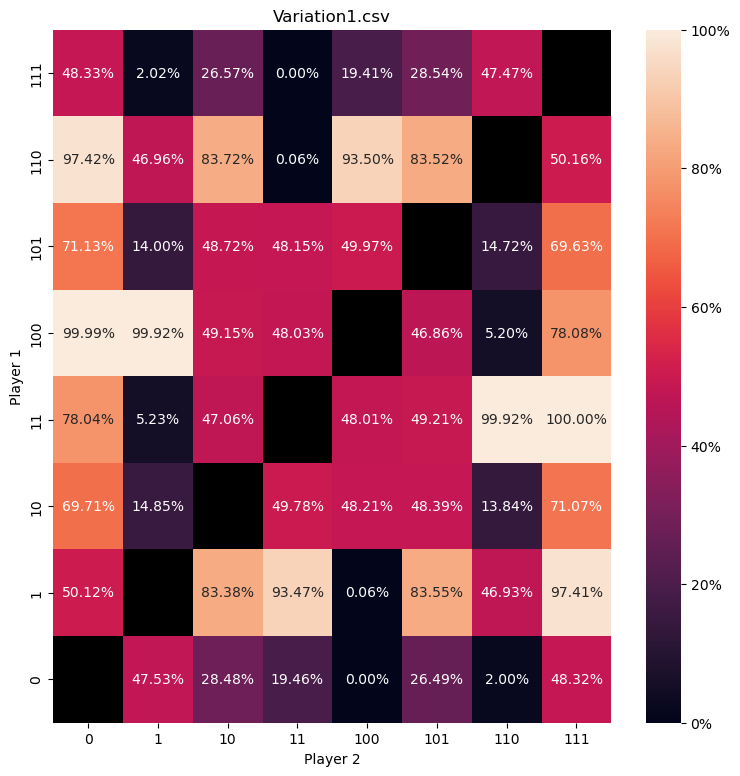

In [49]:
plt.figure(figsize=(9,9))
ax = sns.heatmap(np.flip(matrix, axis=0), 
                 annot = True, fmt = '.2f',
                 vmin = 0.0, vmax = 100.0, cbar_kws={'format': '%.0f%%'},
                 xticklabels = seqs,
                 yticklabels = np.flip(seqs))
ax.set_facecolor('black')
for t in ax.texts: t.set_text(t.get_text() + "%")

plt.title(path)
plt.xlabel('Player 2')
plt.ylabel('Player 1')
ax.get_figure().savefig('heatmp.jpg')

In [3]:
def generate_heatmap(path:str, vmin:float=0.0, vmax:float=100.0, 
                     title:str='', filename:str=None):
    '''
    Generate a heatmap of winning probabilities for each player combination of color sequences.

    Args:
        path: Path to csv file with the simulation data.
        vmin, vmax: Value bounds for the heatmap.
        title: Title to display on the generated heatmap.
        filename: Filename for generated heatmap; uses path and png extension if None.
    '''
    data = pd.read_csv(path)
    
    # mean() is redundant here
    # This mainly exists for readability later on
    probs = data[['Sequence 1', 'Sequence 2', 'Player 1 Win %']].groupby(['Sequence 1', 'Sequence 2']).mean()
    
    seqs = ['000', '001', '010', '011', '100', '101', '110', '111'] # All possible color sequences
    matrix = np.zeros((8,8)) # For storing probabilities

    # Fill matrix
    for p1_idx, p1_seq in enumerate(seqs):
        for p2_idx, p2_seq in enumerate(seqs):
            if p1_seq == p2_seq:
                # Make duplicate sequnce pairs nan values (to be black on heatmap later)
                matrix[p1_idx][p2_idx] = np.nan
                continue
                
            matrix[p1_idx][p2_idx] = probs.loc[int(p1_seq)].loc[int(p2_seq)].values[0]

    # Generate heatmap
    seqs = ['RRR', 'RRB', 'RBR', 'RBB', 'BRR', 'BRB', 'BBR', 'BBB'] # All possible color sequences (but in letters)
    plt.figure(figsize=(9,9))
    ax = sns.heatmap(np.flip(matrix, axis=0), 
                     annot = True, fmt = '.2f', cmap='Blues',
                     vmin = vmin, vmax = vmax, cbar_kws={'format': '%.0f%%'},
                     xticklabels = seqs,
                     yticklabels = np.flip(seqs))
    ax.set_facecolor('black') # Make diagonal black
    for t in ax.texts: t.set_text(t.get_text() + "%") # Add % after each annotation text
    
    plt.title(title)
    plt.xlabel('Player 2 Sequence')
    plt.ylabel('Player 1 Sequence')
    
    # Save heatmap
    if filename == None:
        filename = f'{path}.png'
    ax.get_figure().savefig(filename)
    
    print(f'<> {filename} saved <>')

<> var1.png saved <>


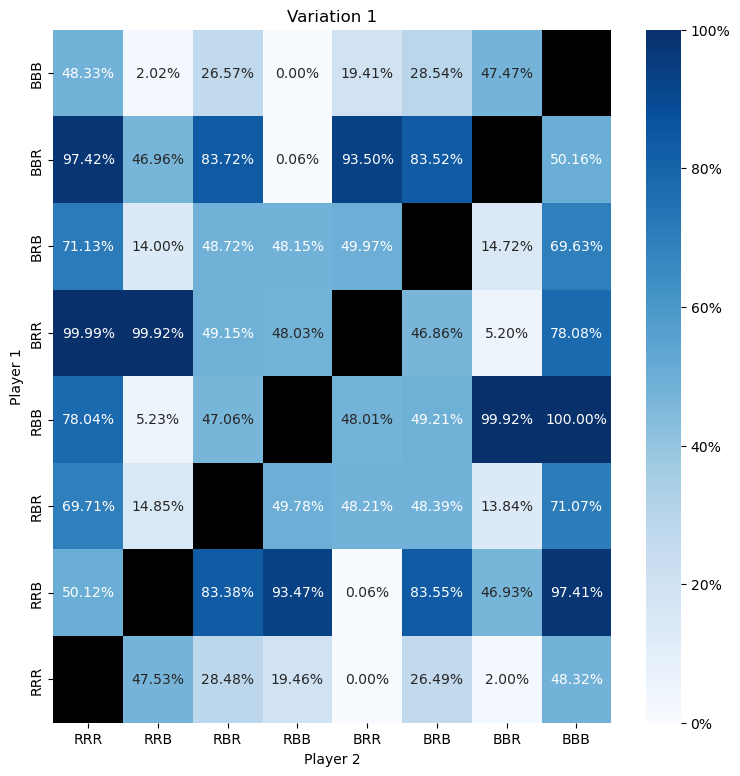

In [4]:
generate_heatmap('Variation1.csv', title='Variation 1', filename='var1.png')

<> var2.png saved <>


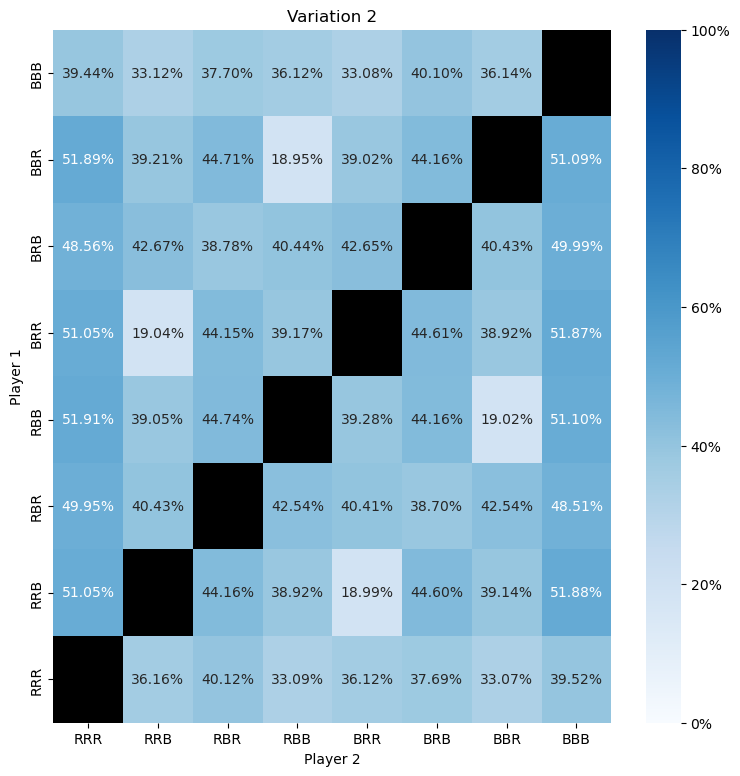

In [6]:
generate_heatmap('Variation2.csv', vmin=0.0, vmax=100.0,
                 title='Variation 2', filename='var2.png')